<a href="https://colab.research.google.com/github/Nannanpeng/Macro-I/blob/main/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
import os

# Below sets up the directory to save the results. use '#' to comment and run.  
drive.mount('/content/drive', force_remount=True)
os.chdir("/content/drive/My Drive/Macro_I")

Mounted at /content/drive


# Question 1

In [5]:
k0 = 0.1
T = 40

A = 2.0
alpha = 0.5
delta = 0.5

sigma = 0.5
beta = 0.9

c0_max = 0.3
c0_min = 0

In [6]:
class binary_search_GE:
    def __init__(self, k_0 = k0, beta_ = beta, A_ = A, alpha_ = alpha,
                 delta_ = delta, sigma_ = sigma):
        self.k_0 = k_0
        self.beta_ = beta_
        self.A_ = A_
        self.alpha_ = alpha_
        self.delta_ = delta_
        self.sigma_ = sigma_

    def compute_equilibrium(self):
        k_star = ((1/self.beta_ - 1 + self.delta_)/(self.alpha_*self.A_))**(1/(self.alpha_ - 1))
        c_star = self.A_*k_star**self.alpha_ - self.delta_*k_star
        return c_star, k_star

    def compute_consumption_capital(self, c_0, n_iter):
        store_k = np.zeros(n_iter)
        store_c = np.zeros_like(store_k)

        store_k[0] = self.k_0   
        store_c[0] = c_0
        for i in range(1, n_iter):
            store_k[i] = self.A_*store_k[i-1]**self.alpha_ + (1 - self.delta_)*store_k[i-1] - store_c[i-1]
            if store_k[i] < 0 :
                store_k[i] = 0
                break
            store_c[i] = ( self.beta_*(1 + self.alpha_*self.A_*store_k[i]**(self.alpha_-1) - self.delta_) )**(1/self.sigma_)*store_c[i-1]
        return store_c, store_k 

    # using binary search to find the path of stable arm 
    def find_consumption_capital_path(self, n_iter = 1000, err=1e-5, period = T, cmin = c0_min, cmax = c0_max):
        eps = 1
        iter_count = 0
        _, kstar_ = self.compute_equilibrium()

        while eps > err and iter_count <= n_iter:
            c0 = (cmin + cmax)/2
            c_path, k_path = self.compute_consumption_capital(c0, period)
            eps = np.abs(k_path[-1] - kstar_)
            if k_path[-1] >= kstar_:
                cmin = c0
            else:
                cmax = c0
            iter_count += 1
            if iter_count % 20 == 0 or eps < err:
                print(f'Error is {eps:f} after {iter_count} iterations.')
        if iter_count > n_iter:
            print('Reach maximum num. of iterations.')
        return c_path, k_path

Equilibrium

In [7]:
%precision 4
bsGE = binary_search_GE()
c_star, k_star = bsGE.compute_equilibrium()
c_star, k_star

(1.9339, 2.6777)

Find the stable arm when $k_0 = 0.1$

In [8]:
c_path_1, k_path_1 = bsGE.find_consumption_capital_path()

Error is 13.124985 after 20 iterations.
Error is 0.002767 after 40 iterations.
Error is 0.000001 after 50 iterations.


Consumption and aseet holings in the first 20 periods

In [9]:
max_T = 20
cs = c_path_1[0]
c_sa_path, k_sa_path = bsGE.compute_consumption_capital(cs, n_iter=max_T)
print(f'The initial consumption is {cs:f} when k0 is {k0}.')

The initial consumption is 0.190725 when k0 is 0.1.


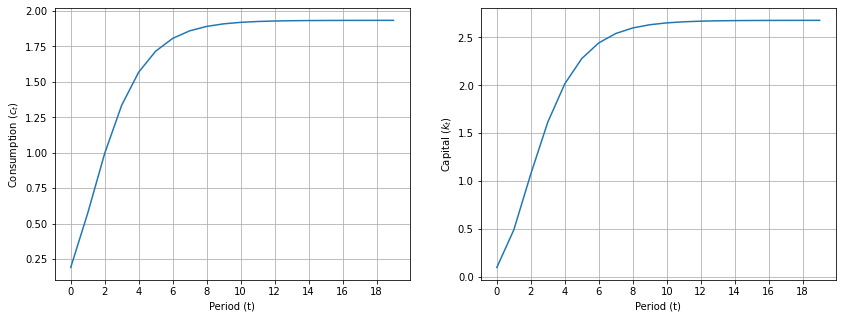

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
consum_capital_paths = [ c_sa_path, k_sa_path]
ytitles = ['Consumption ($c_t$)', 'Capital ($k_t$)']
for ax, path, ytitle in zip(axes, consum_capital_paths, ytitles):
    ax.plot(path)
    ax.grid()
    ax.set_xticks(np.arange(0, max_T, 2))
    ax.set(xlabel='Period (t)', ylabel=ytitle)

fig.savefig('HW5_Q1.png', dpi=300)

# Question 2

### part c:

In [11]:
%precision 4
A_new = 1.5
bsGE_new = binary_search_GE(k_0 = k_star, A_ = A_new)
c_star_new, k_star_new = bsGE_new.compute_equilibrium()
c_star_new, k_star_new

(1.0878, 1.5062)

In [12]:
cmax_new = c_star_new*3
c_path_2, k_path_2 = bsGE_new.find_consumption_capital_path(cmax=cmax_new)

Error is 7.390835 after 20 iterations.
Error is 0.165586 after 40 iterations.
Error is 0.000008 after 51 iterations.


In [13]:
max_T = 20
cs = c_path_2[0]
c_sa_path, k_sa_path = bsGE_new.compute_consumption_capital(cs, n_iter=max_T)
print(f'The initial consumption is {cs:f} when k0 is {k0}.')
print(f'The consumption in old equilibrium is {c_star:f} when k0 is {k0}.')

The initial consumption is 1.678578 when k0 is 0.1.
The consumption in old equilibrium is 1.933884 when k0 is 0.1.


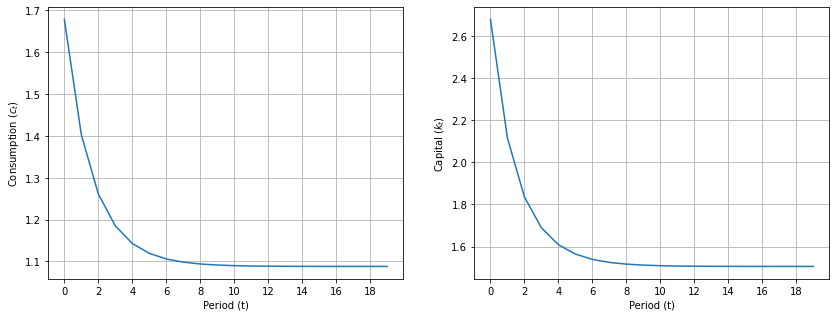

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
consum_capital_paths = [ c_sa_path, k_sa_path]
ytitles = ['Consumption ($c_t$)', 'Capital ($k_t$)']
for ax, path, ytitle in zip(axes, consum_capital_paths, ytitles):
    ax.plot(path)
    ax.grid()
    ax.set_xticks(np.arange(0, max_T, 2))
    ax.set(xlabel='Period (t)', ylabel=ytitle)

fig.savefig('HW5_Q2_c.png', dpi=300)

### part d:

In [15]:
sigma_new = 0.1
bsGE_new = binary_search_GE(k_0 = k_star, sigma_ = sigma_new)
c_star_new, k_star_new = bsGE_new.compute_equilibrium()
c_star_new, k_star_new

(1.9339, 2.6777)

In [16]:
c_path_3, k_path_3 = bsGE_new.find_consumption_capital_path(cmax = c_star_new)

Error is 13.315743 after 20 iterations.
Error is 13.192709 after 40 iterations.
Error is 0.000000 after 51 iterations.


In [17]:
max_T = 20
cs = c_path_3[0]
c_sa_path, k_sa_path = bsGE_new.compute_consumption_capital(cs, n_iter=max_T)
print(f'The initial consumption is {cs:f} when k0 is {k0}.')
#print(f'The consumption in old equilibrium is {c_star:f} when k0 is {k0}.')

The initial consumption is 1.933884 when k0 is 0.1.


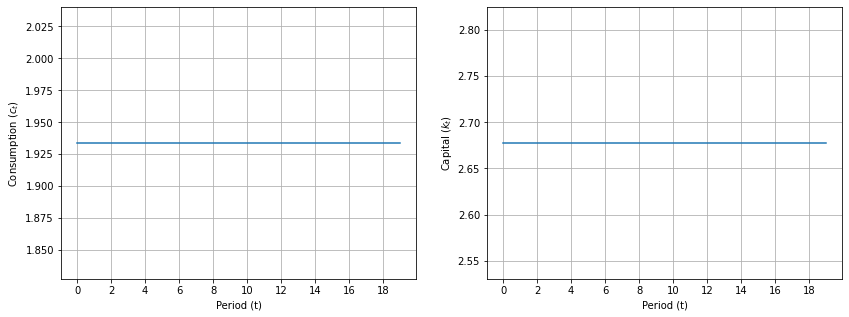

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
consum_capital_paths = [ c_sa_path, k_sa_path]
ytitles = ['Consumption ($c_t$)', 'Capital ($k_t$)']
for ax, path, ytitle in zip(axes, consum_capital_paths, ytitles):
    ax.plot(path)
    ax.grid()
    ax.set_xticks(np.arange(0, max_T, 2))
    ax.set(xlabel='Period (t)', ylabel=ytitle)

fig.savefig('HW5_Q2_d.png', dpi=300)